<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/MICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer  #Enable experimental mode
from sklearn.impute import IterativeImputer

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

In [24]:
# Create dataset
def missingCreate(nSample, nFeatures, missingRate):
  X = np.random.randn(nSample, nFeatures)
  df = pd.DataFrame(X.copy())
  X = pd.DataFrame(X)
  ix = [(row, col) for row in range(X.shape[0]) for col in range(X.shape[1])]
  for row, col in random.sample(ix, int(round(missingRate * len(ix)))):
    X.iat[row, col] = np.nan
  return df, X

df, X = missingCreate(100, 10, 0.3)

In [25]:
#Checking missing values
print(df.isnull().sum())
print(X.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64
0    23
1    28
2    28
3    34
4    29
5    34
6    23
7    39
8    31
9    31
dtype: int64


In [44]:
# Plot compare function
n = np.random.choice(df.shape[1], 2) #Random columns

def plotCompare(data, dataMissing):
  plt.figure(figsize = (6 * n.shape[0], 4))
  for j, i in enumerate(n):
    plt.subplot(1, n.shape[0], j + 1)
    plt.plot(data[i], c = 'darkorange', label = 'Original')
    plt.plot(dataMissing[i], c = 'forestgreen', linewidth = 2, linestyle = '--')
    plt.legend(frameon = True, facecolor = 'white')
    plt.title(f'Compare column: {i}')
  return plt.show()

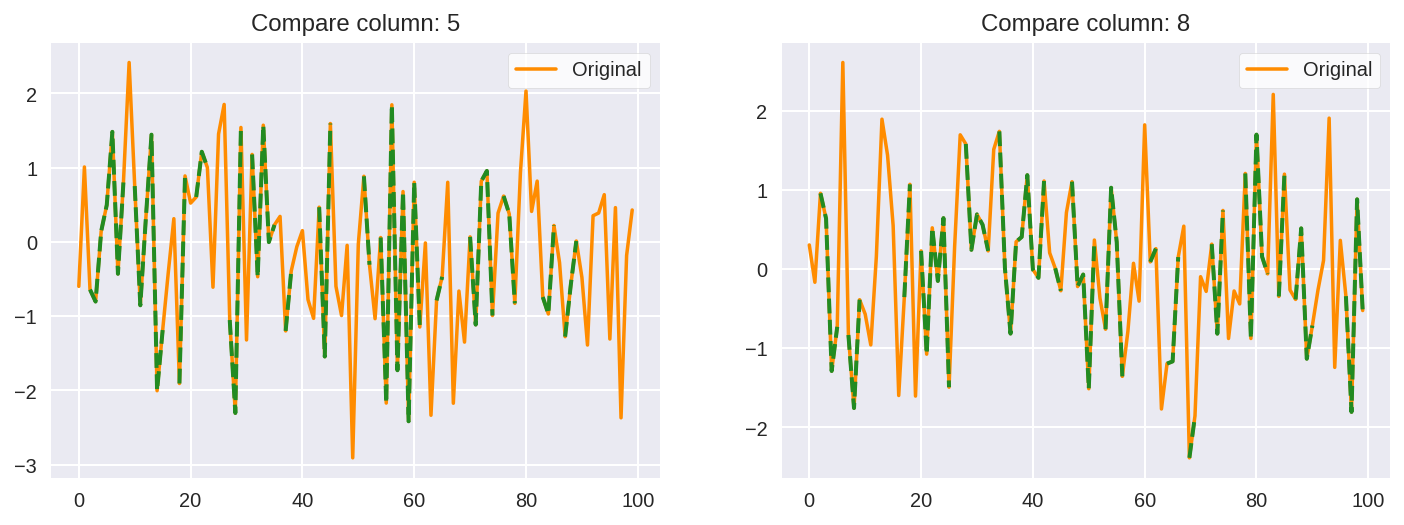

In [45]:
# Plot compare
plotCompare(df, X)

In [46]:
# MICE
model = LinearRegression()
imputer = IterativeImputer(estimator = model,
                           max_iter = 30,
                           initial_strategy = 'mean')

In [47]:
# Fitting MICE
imputer.fit(X)

IterativeImputer(add_indicator=False,
                 estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                            n_jobs=None, normalize=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=30, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [48]:
# Imputed data
XImputed = imputer.transform(X)
XImputed = pd.DataFrame(XImputed, columns = X.columns) #To dataframe

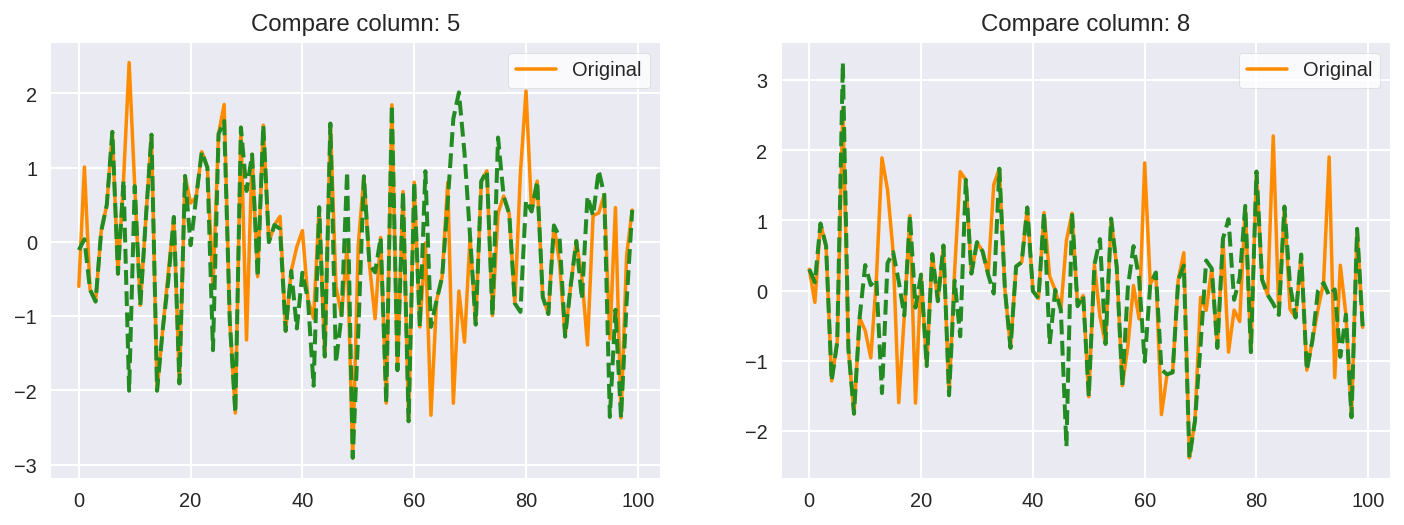

In [49]:
# Plot compare
plotCompare(df, XImputed)